### Implementing a Neural Network for testing

torch.Size([100, 1, 28, 28]) torch.Size([100])


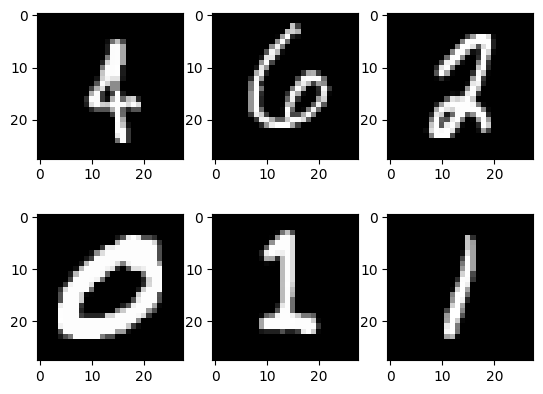

In [10]:
# MNIST
# DataLoader, Transformation
# Multilayer Neural Net, activation function
# Loss and Optimizer
# Training Loop (batch training)
# Model evaluation
# GPU support

import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

#device config
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

#hyper parameters
input_size = 784 # 28x28 (flatten image tensor)
hidden_size = 100 # you can try out different sizes
num_classes = 10
num_epochs = 2
batch_size = 100
learning_rate = 0.001

#MNIST data
train_dataset = torchvision.datasets.MNIST(root='./data', train=True,
                                           transform=transforms.ToTensor(),
                                           download=True)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False,
                                           transform=transforms.ToTensor())

train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)
examples = iter(train_loader)
samples,labels = next(examples)
print(samples.shape, labels.shape)

for i in range(6):
  plt.subplot(2,3, i+1)
  plt.imshow(samples[i][0], cmap='gray')
plt.show()


In [17]:
#creating the neural network
class NeuralNet(nn.Module):
  def __init__(self, input_size, hidden_size,output_size):
    super(NeuralNet, self).__init__() #output size = num_classes
    self.l1 = nn.Linear(input_size, hidden_size)
    self.relu = nn.ReLU()
    self.l2 = nn.Linear(hidden_size, output_size)

  def forward(self, x):
    out = self.l1(x)
    out = self.relu(out)
    out = self.l2(out)
    #we don't apply softmax here Cross Entropy Loss already applies
    return out

model = NeuralNet(input_size, hidden_size, num_classes).to(device)

In [18]:
# loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate) #adam optimizer

#training loop
n_total_steps = len(train_loader)
for epoch in range(num_epochs):
  for i, (images, labels) in enumerate(train_loader):
    # 100, 1, 28, 28
    # tensor must be 100, 784
    images = images.reshape(-1, 28*28).to(device) #push to gpu
    labels = labels.to(device)

    #forward
    outputs = model(images)
    loss = criterion(outputs,labels)

    #backwards
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if(i+1)%100 == 0:
      print(f'epoch {epoch+1} / {num_epochs}, step{i+1}/{n_total_steps}, loss = {loss.item():.4f}')


epoch 1 / 2, step100/600, loss = 0.4338
epoch 1 / 2, step200/600, loss = 0.3054
epoch 1 / 2, step300/600, loss = 0.2994
epoch 1 / 2, step400/600, loss = 0.2314
epoch 1 / 2, step500/600, loss = 0.2288
epoch 1 / 2, step600/600, loss = 0.1324
epoch 2 / 2, step100/600, loss = 0.2694
epoch 2 / 2, step200/600, loss = 0.1940
epoch 2 / 2, step300/600, loss = 0.1341
epoch 2 / 2, step400/600, loss = 0.1823
epoch 2 / 2, step500/600, loss = 0.1267
epoch 2 / 2, step600/600, loss = 0.0920


In [20]:
#test
with torch.no_grad():
  n_correct = 0
  n_samples = 0
  for images, labels in test_loader:
    images = images.reshape(-1, 28*28).to(device)
    labels = labels.to(device)
    output = model(images)#our trained model already

    #value, index (we need the index class)
    _, predictions = torch.max(outputs, 1)
    n_samples += labels.shape[0] #number of samples of the batch
    n_correct += (predictions == labels).sum().item() #plus 1 for each correct


  acc = 100.0 * n_correct / n_samples
  print(f'accuracy = {acc:.2f}')

accuracy = 10.15
